In [82]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

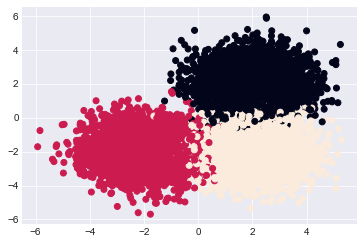

In [83]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# Mean-Shift

Number of estimated clusters: 3


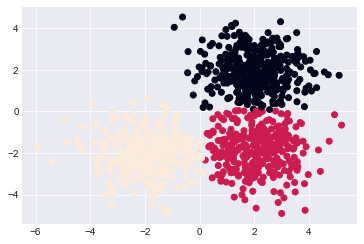

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [84]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# Spectral Clustering

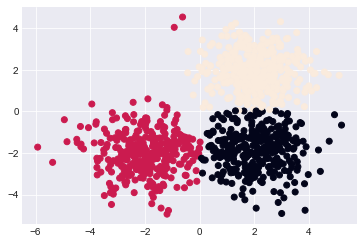

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       10    2  350
1        9  310    1
2      305    6    7


In [85]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

# Affinity Propagation

In [86]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


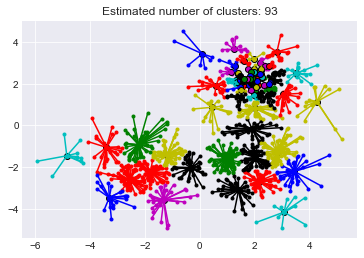

In [87]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

Each Blob configuration and the four methods would be followed by a general observation how the blobs performed when run. 

In [88]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

## Blob 1: 2-blobs, Farther Apart

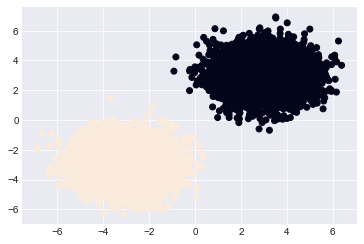

In [89]:
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Mean shift clusters:  2


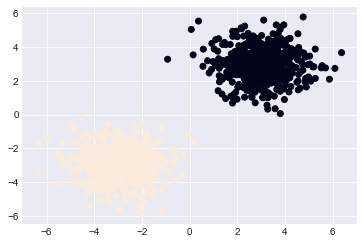

Mean Shift, Blob 1:
col_0    0    1
row_0          
0      512    0
1        0  488


In [90]:
# Mean-Shift
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print('Mean shift clusters: ', n_clusters_)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
# Check solution 
print('Mean Shift, Blob 1:')
print(pd.crosstab(labels, y_train))

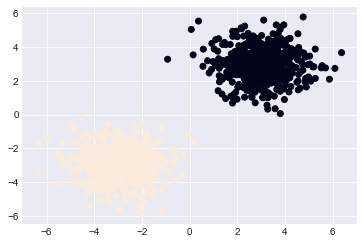

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    0
1        0  488


In [91]:
#KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

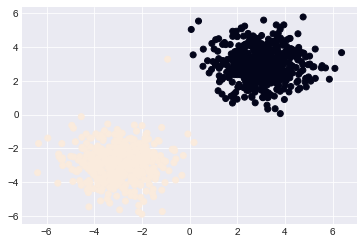

Blob 1 Spectral Clustering
col_0    0    1
row_0          
0      511    1
1        0  488


In [92]:
#Spectral
n_clusters=2
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
predict=sc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()
print('Blob 1 Spectral Clustering')
print(pd.crosstab(y_train, predict))

Done
Estimated number of clusters: 16


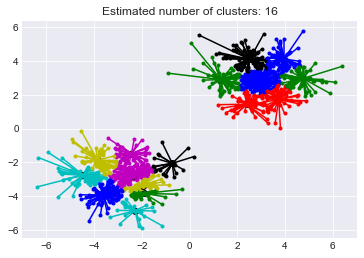

In [93]:
#Affinity Propagation
af = AffinityPropagation().fit(X_train)
print('Done')
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

For Blob 1, K-Means and Mean-shift worked flawlessly. For spectral clustering, the one white dot at the top with the black cluster should be interesting to look into. There's a glaring contrast between affinity propagation and other methods, as it performed comparatively poorly, yielding 16 clusters. 

## Blob 2: 4-blobs, closer together

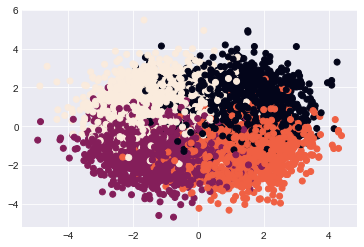

In [94]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Mean shift clusters:  2


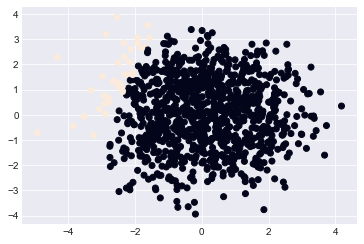

Mean Shift, Blob 2:
col_0    0    1    2    3
row_0                    
0      271  233  238  222
1        2    6    0   28


In [95]:
# Mean-Shift
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print('Mean shift clusters: ', n_clusters_)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
# Check solution 
print('Mean Shift, Blob 2:')
print(pd.crosstab(labels, y_train))

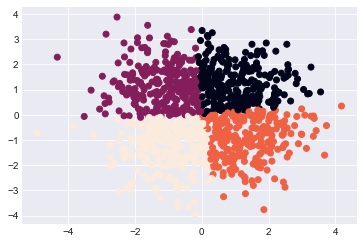

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      191    5   20   39
1       32   35    7  179
2       43   31  176    6
3        7  168   35   26


In [96]:
#KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

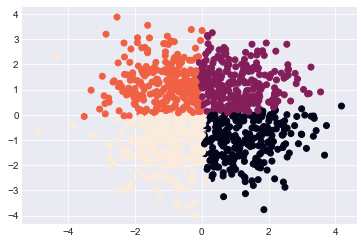

Blob 2 Spectral Clustering
col_0    0    1    2    3
row_0                    
0       39  194   33    7
1       31    4   31  173
2      181   21    6   30
3        6   38  176   30


In [97]:
#Spectral
n_clusters=4
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
predict=sc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()
print('Blob 2 Spectral Clustering')
print(pd.crosstab(y_train, predict))

Done
Estimated number of clusters: 35


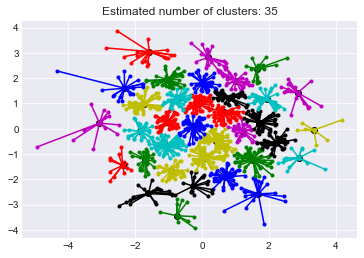

In [98]:
#Affinity Propagation
af = AffinityPropagation().fit(X_train)
print('Done')
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Mean-shift only identified two clusters for Blob 2, which has 4 clusters close together, but were the clusters were separate from one another - one cluster was way more overestimated compared to the other. Both K-Means and Spectral seem to perform well with Blob 2, although the spectral clustering seems to yield more outliers (black). As expected, affinity propagation produced clusters that are far more than necessary; here we see a trend of over-identifying clusters when aff. propagation is used.

## Blob 3: 3-blobs, farther apart

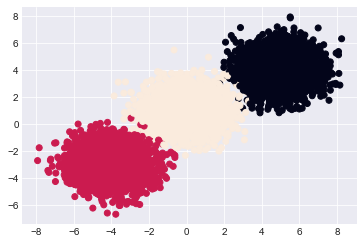

In [99]:
# The coordinates of the centers of our blobs.
centers = [[5, 4], [-4, -3], [0, 1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Mean shift clusters:  3


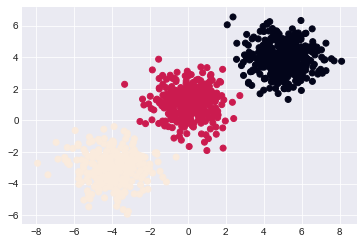

Mean Shift, Blob 3:
col_0    0    1    2
row_0               
0      362    0    2
1        0    1  316
2        0  319    0


In [100]:
# Mean-Shift
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print('Mean shift clusters: ', n_clusters_)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
# Check solution 
print('Mean Shift, Blob 3:')
print(pd.crosstab(labels, y_train))

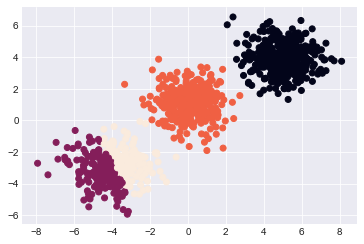

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      362    0    2
1        0  178    0
2        0    0  315
3        0  142    1


In [101]:
#KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

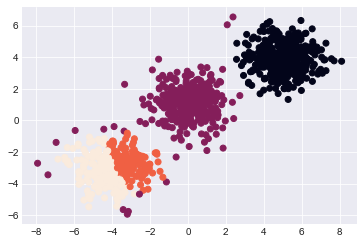

Blob 3 Spectral Clustering
col_0    0    1    2    3
row_0                    
0      360    2    0    0
1        0   14  127  179
2        2  316    0    0


In [102]:
#Spectral
n_clusters=4
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
predict=sc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()
print('Blob 3 Spectral Clustering')
print(pd.crosstab(y_train, predict))

Done
Estimated number of clusters: 100


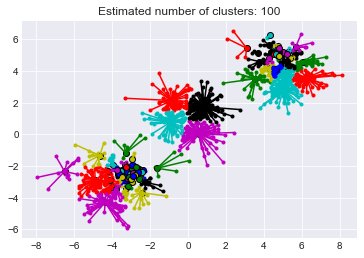

In [103]:
#Affinity Propagation
af = AffinityPropagation().fit(X_train)
print('Done')
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

K-Means and Mean-shift look good - K-means has been, when used for the three blobs, the most consistent performer. Spectral clustering produced four clusters, but did so by cutting up one true cluster (black); it would be interesting to identify the reasoning behind this. While expected, the clusters produced by aff. prop. is...laughable - so we will adjust the standard deviation of the last blob to see if we could bring this number down. 

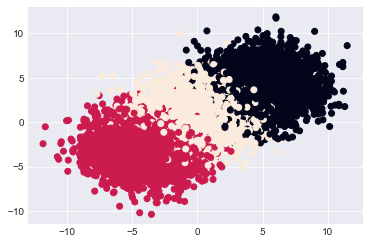

In [104]:
# The coordinates of the centers of our blobs.
centers = [[5, 4], [-4, -3], [0, 1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 2.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Done
Estimated number of clusters: 31


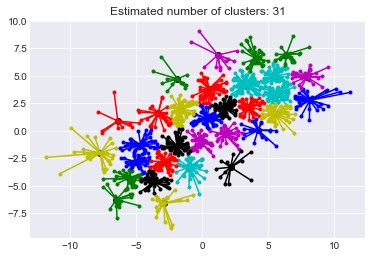

In [105]:
#Affinity Propagation Pt.2
af = AffinityPropagation().fit(X_train)
print('Done')
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

This drastically improves things; the observation here is that with a higher standard deviation, aff. prop. tends to perform better, keeping cluster estimations "contained". 

Mean shift clusters:  3


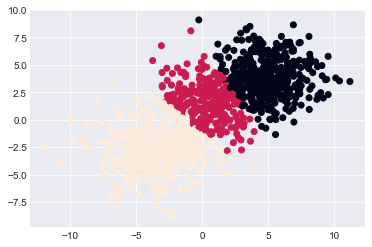

Mean Shift, Blob 3:
col_0    0    1    2
row_0               
0      342    0   31
1       20    8  223
2        0  312   64


In [106]:
#and just to see if a higher standard deviation changes things for other methods, we're re-running the mean-shift method
# Mean-Shift
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print('Mean shift clusters: ', n_clusters_)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
# Check solution 
print('Mean Shift, Blob 3:')
print(pd.crosstab(labels, y_train))

Finally, while Mean-shift still looks good with higher standard deviation, the clusters are much closer together, and there seem to be a little more spread out, with more outliers for each cluster. 